## Importing the required packages

In [1]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly
!pip install -U kaleido

import yfinance as yf
import pandas as pd
import requests
from datetime import date
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from matplotlib.backends.backend_pdf import PdfPages
import os

## Defining the `plot_stock` function.
Takes a dataframe with stock data, a dataframe with revenue data, and the name of the stock to plot historical stock prices as well as revenue. Index funds like SYPDER will display only the stock price.

In [2]:
def plot_stock(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    today = date.today().strftime('%Y-%m-%d')
    stock_data_specific = stock_data[stock_data.Date <= today]
    revenue_data_specific = revenue_data[revenue_data.Date <= today]
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show ("png")

## Defining the `stock_vis` function.
Using webscaring to extract revenue data for the companies in the stock portfolio by accessing the MacroTrends website.

In [3]:
def stock_vis (x,y):
    #Creating a ticker object for the stockname to extract the stock price history for the stock. 
    #We use the max parameter to extract information for the maximum amount of time.
    tickername = yf.Ticker(x) 
    stock_data = tickername.history(period="max")
    stock_data.reset_index(inplace=True)
    
    #Creating a URL by inserting the stock name and company into a URL template for web-scraping
    stock_name = x +'/'+ y
    incompleteurl = "https://www.macrotrends.net/stocks/charts//revenue"
    index = incompleteurl.find('/revenue')
    url = incompleteurl[:index] + stock_name + incompleteurl[index:]
    html_data  = requests.get(url).text
    # Using the beautiful soup extract of company's Quarterly Revenue and store it into a dataframe with the columns Date and Revenue.
    soup = BeautifulSoup(html_data, 'html5lib')
    stock_revenue = pd.DataFrame(columns = ["Date", "Revenue"])
    for row in soup.find("tbody").find_all('tr'):
        col = row.find_all("td")
        date = col[0].text
        revenue = col[1].text
        stock_revenue = stock_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)
    
    #Removing commas, Dollar signs, and null values from the Revenue dataframe
    stock_revenue["Revenue"] = stock_revenue['Revenue'].str.replace(',|\$',"", regex=True)
    stock_revenue.dropna(inplace=True) 
    stock_revenue = stock_revenue[stock_revenue['Revenue'] != ""]
    
    #Plotting stock prices and revenue by calling the plot_stock function
    plot_stock(stock_data, stock_revenue, y)

## Importing the Dataset
Importing a two column dataframe, with the stock ticker name as well as the full name of the company. If you import your own stock portfolios, please make sure that it has the two required columns as the first two.

In [4]:
data = pd.read_csv (r'https://raw.githubusercontent.com/Amayb97/PythonCoursera/main/Stocks.csv')  #Importing the csv
df = pd.DataFrame(data) #converting the csv to a dataframe
df = df.sort_values(by = ['Stock'], ignore_index = True) #sorting the stocks in alphabetical order
df

,Stock,Company
0,AAPL,Apple
1,ADT,ADT
2,AMC,AMC
3,AMZN,Amazon
4,BABA,Alibaba
5,DIS,Disney
6,F,Ford
7,MSFT,Microsoft
8,NFLX,Netflix
9,NOK,Nokia


## Using a loop to apply the functions to the dataset

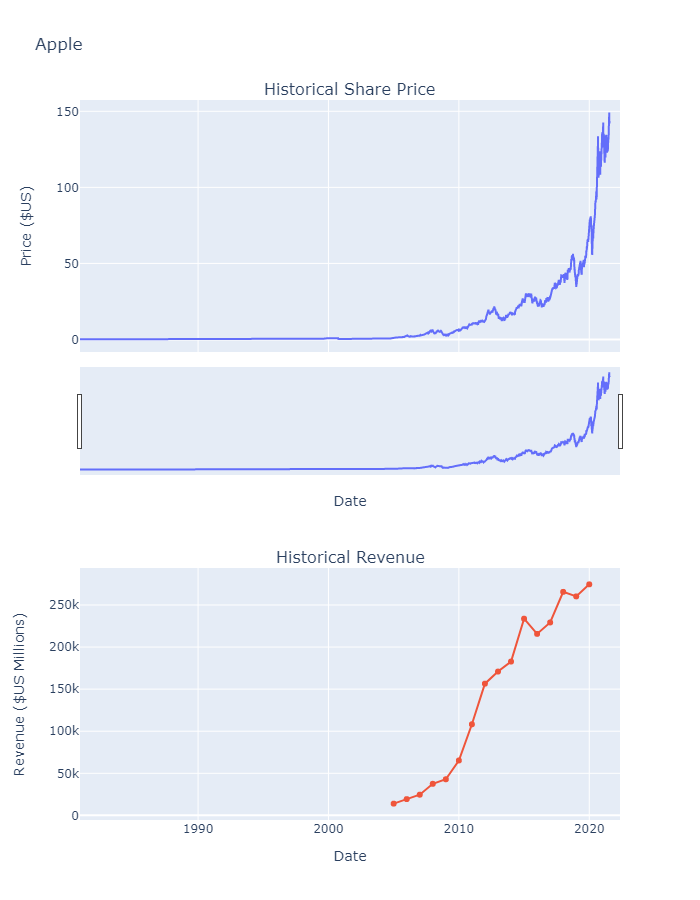

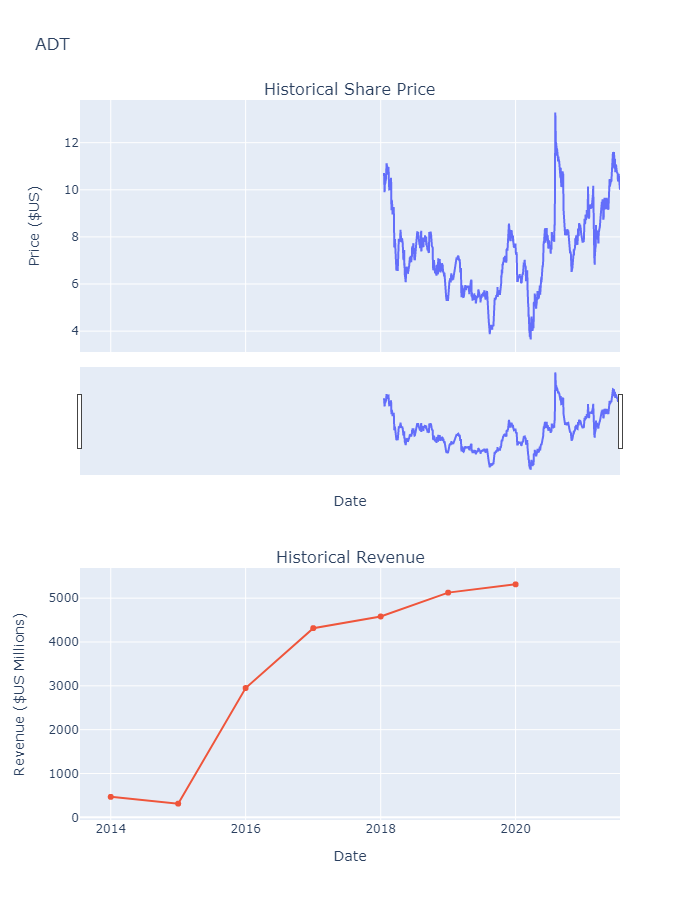

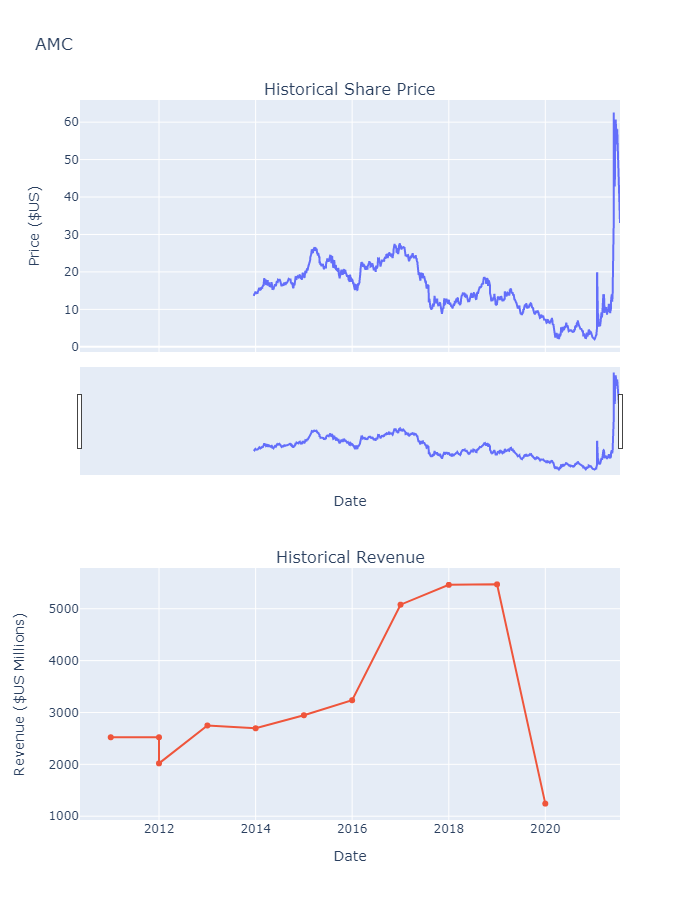

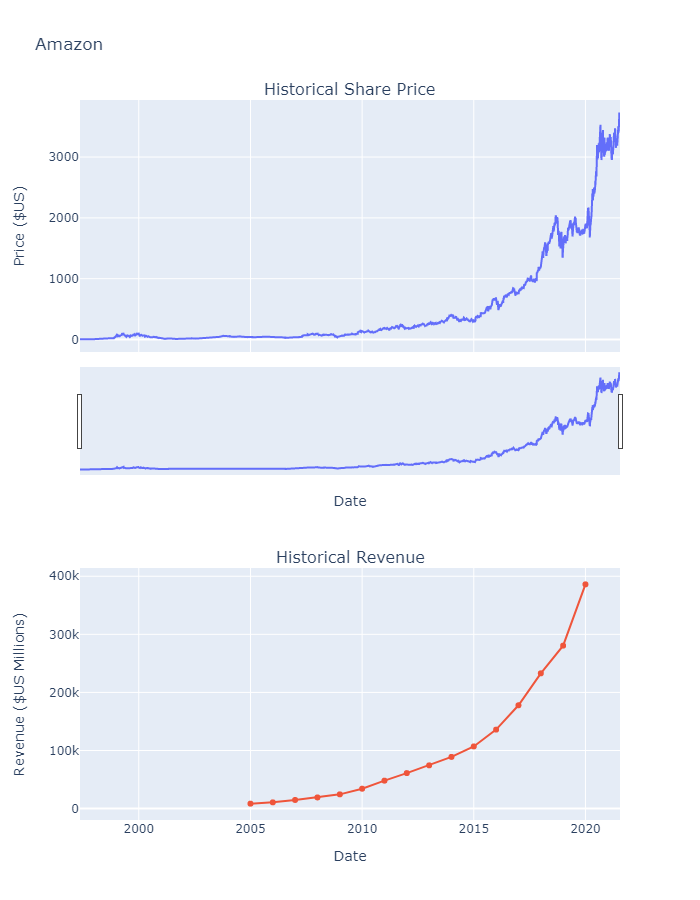

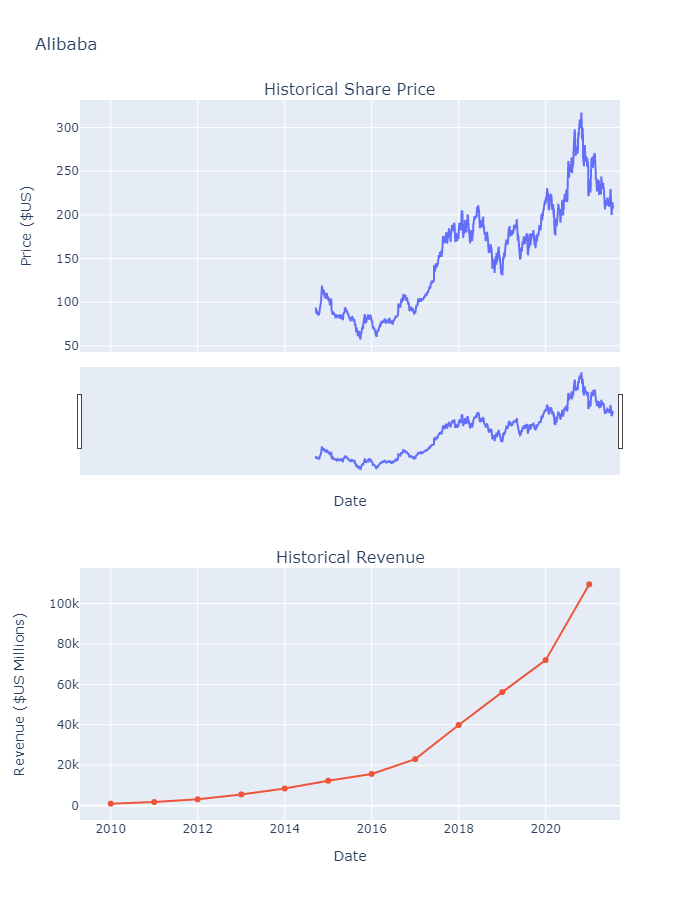

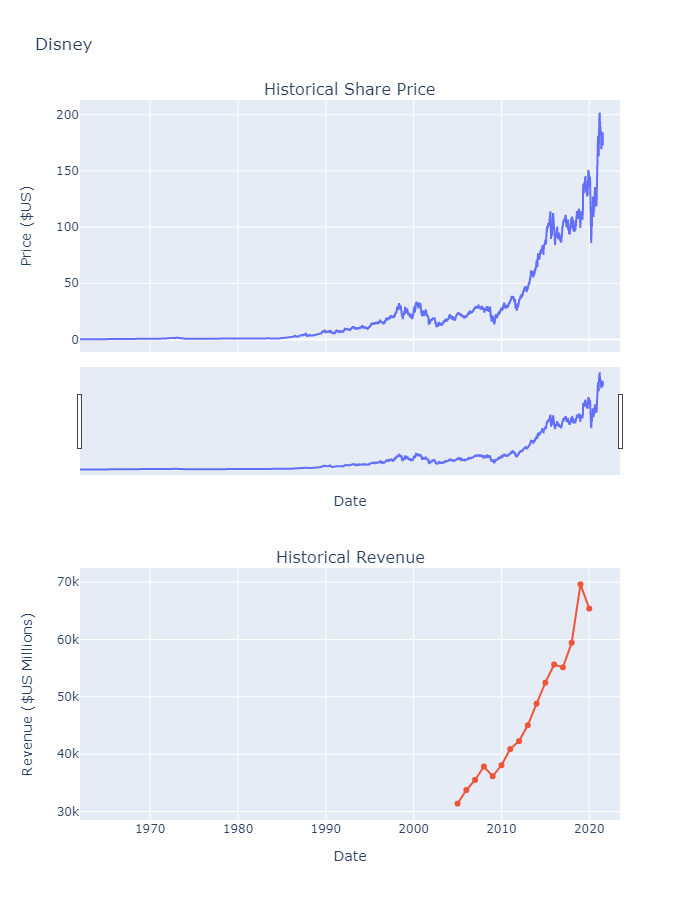

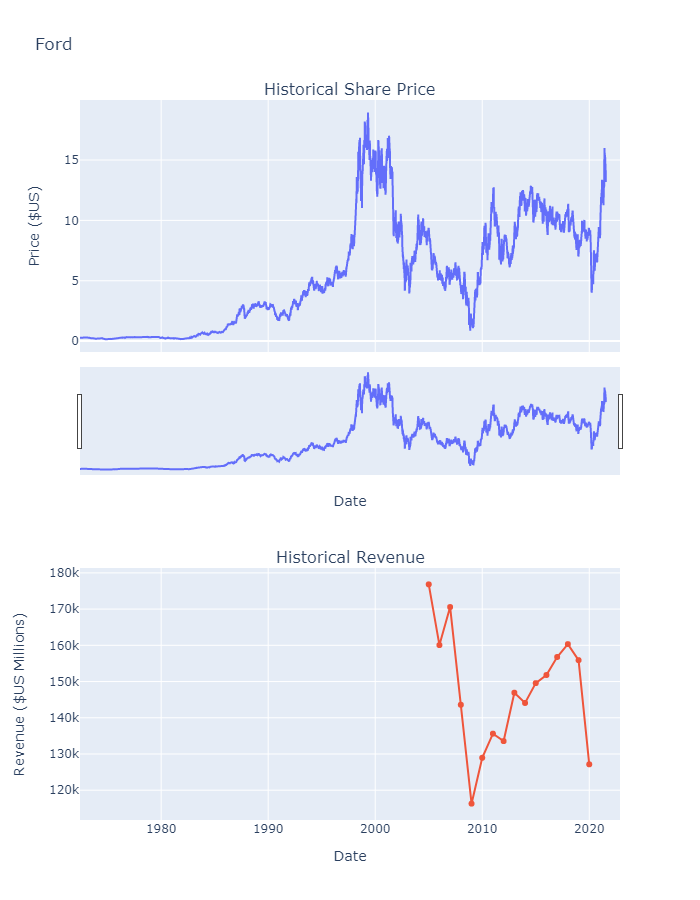

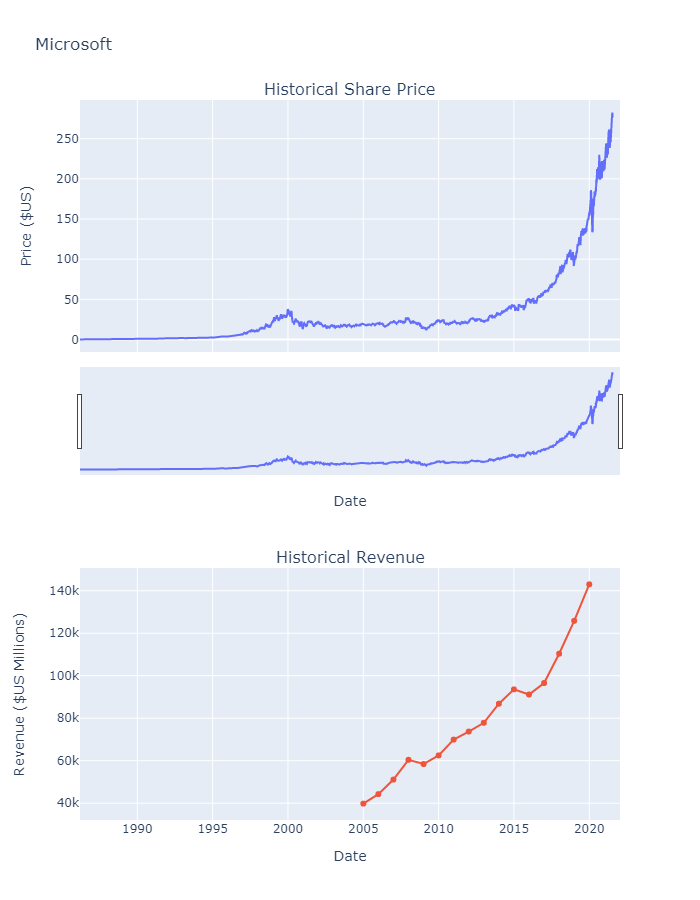

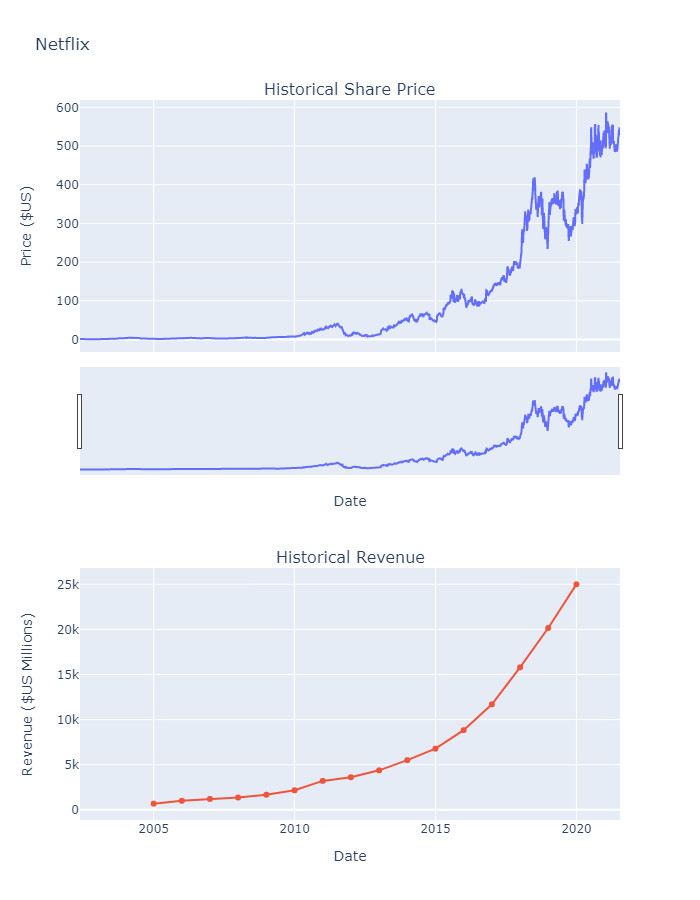

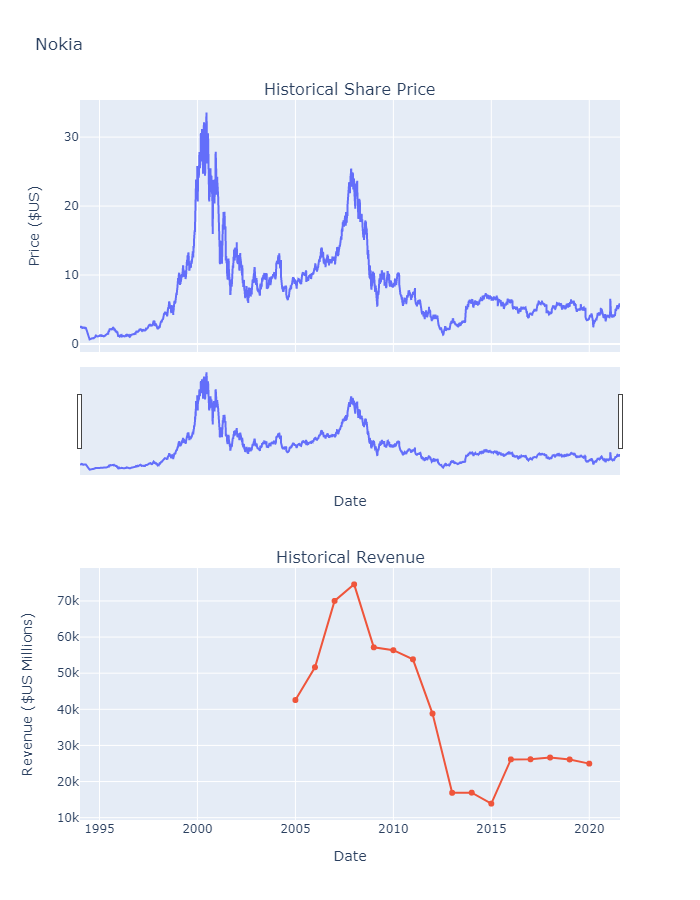

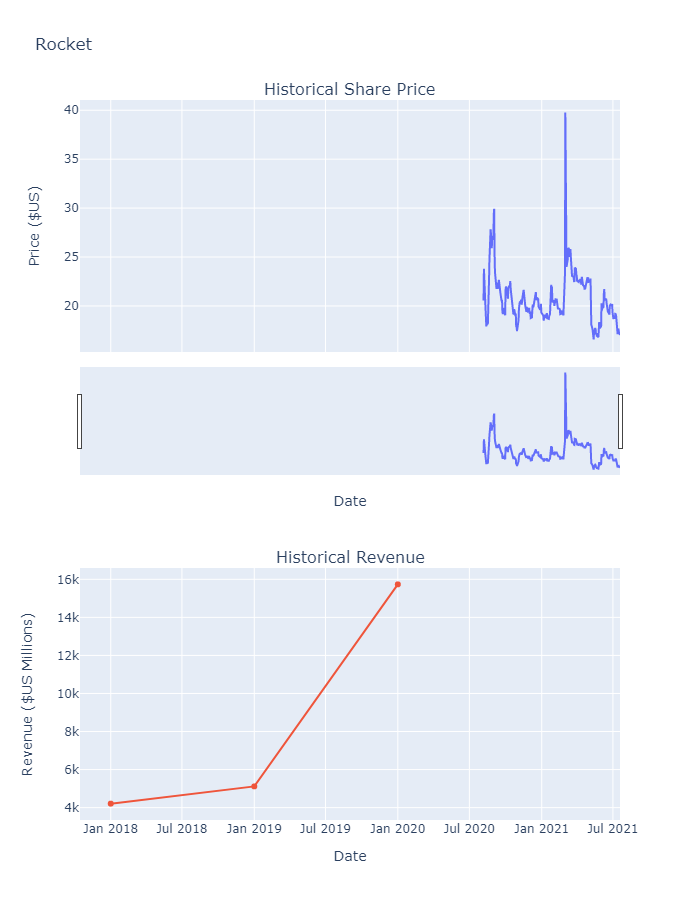

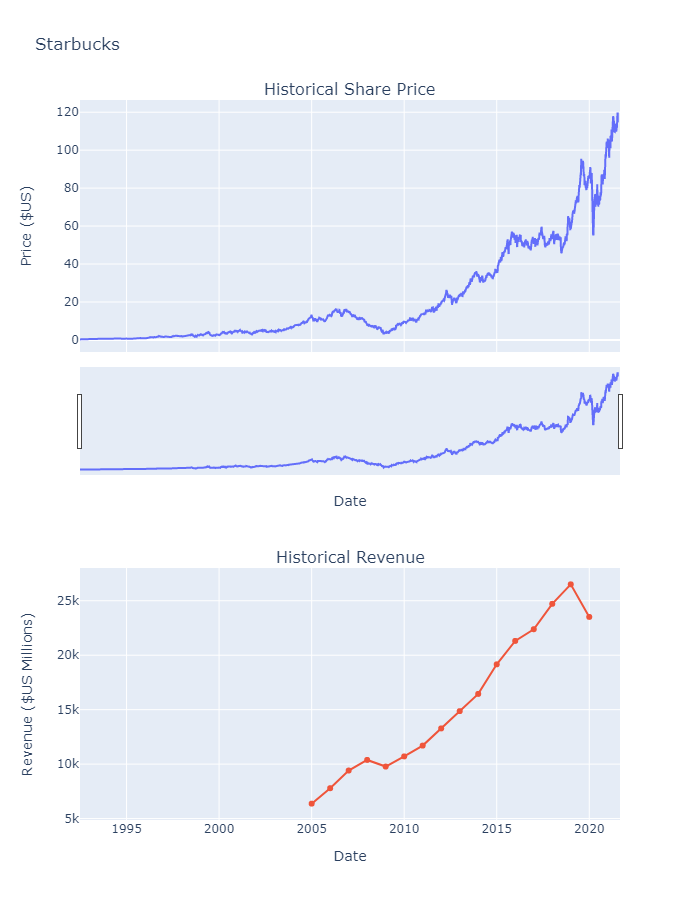

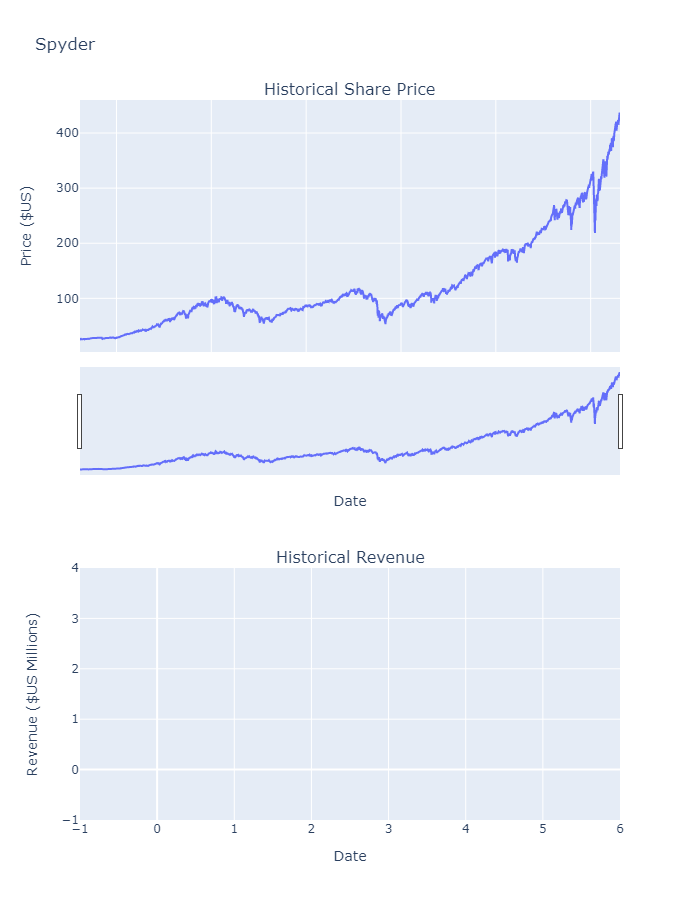

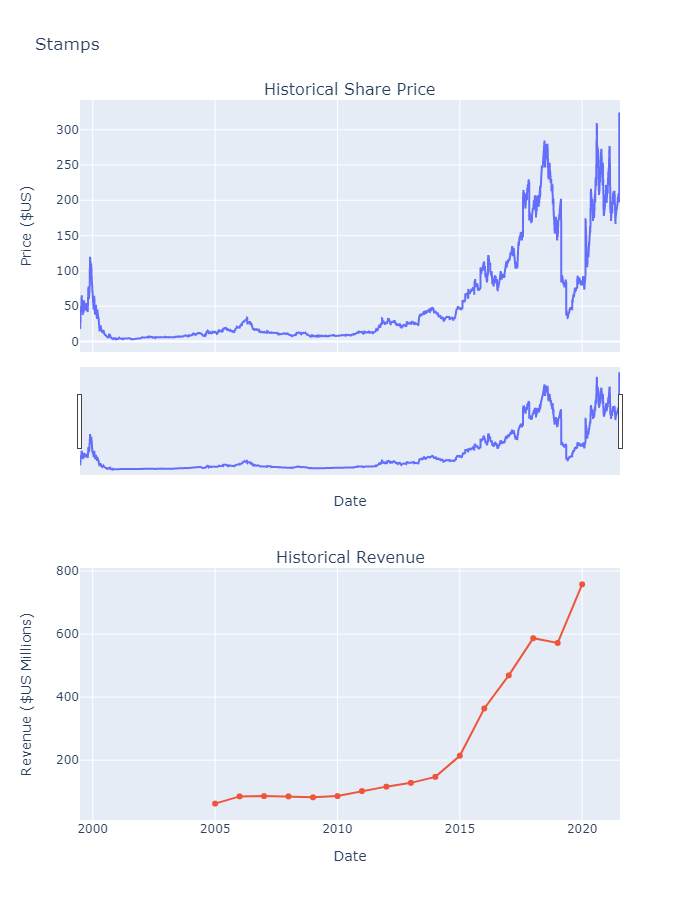

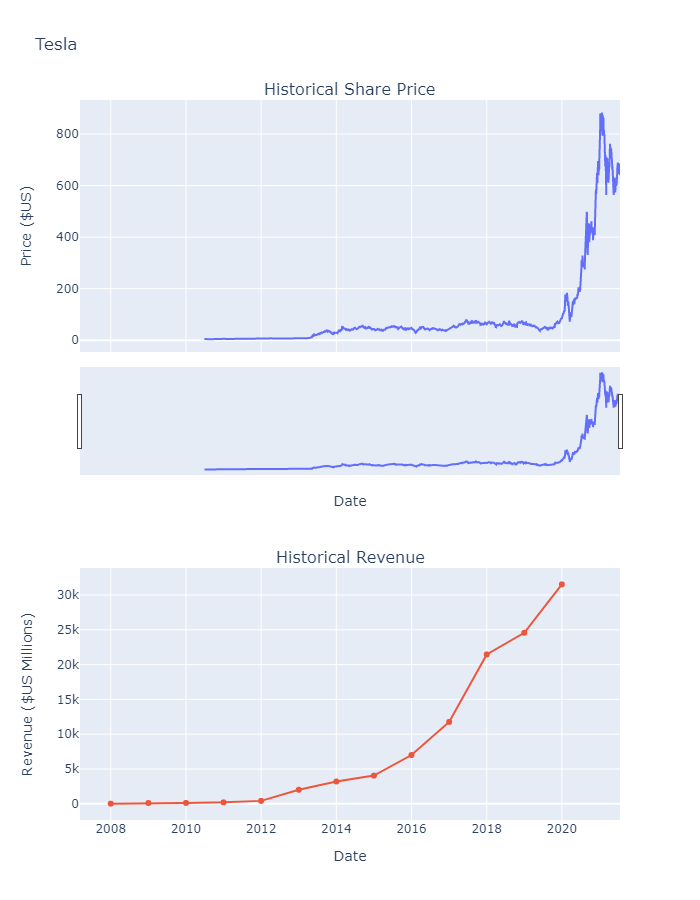

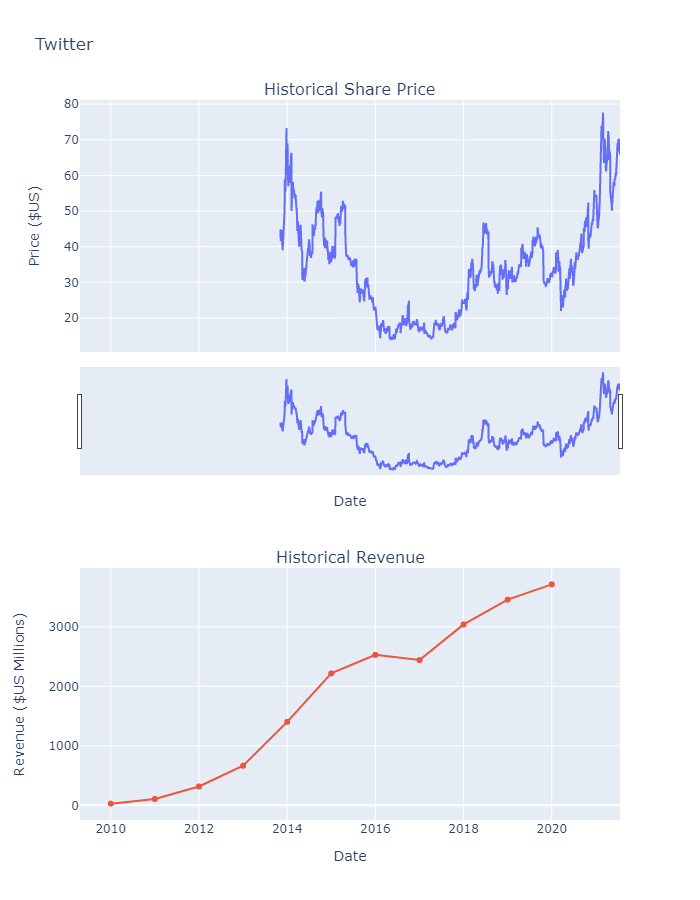

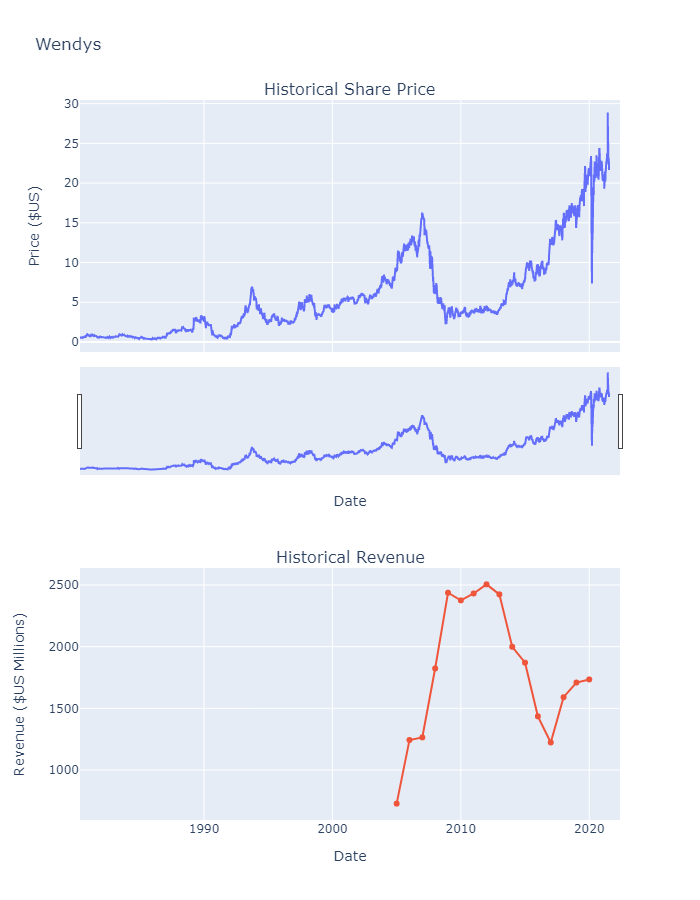

In [5]:
i = 0 # Initializing the index variable 
# A while loop to assign the value of the stock name and company name to the respective variables
# It iterates through the dataframe to plot revenue and stock proce graphs for each stock in the portfolio
while (i<len(df)):
    stock = df.iloc[i,0] 
    company = df.iloc[i,1]
    stock_vis(stock,company)
    i=i+1